In [ ]:
!pip install openai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 7.2 MB/s eta 0:00:00


In [ ]:
import requests
from bs4 import BeautifulSoup
import calendar
import time

In [ ]:
import openai
openai.api_key = ""

def get_gpt_sentiment(text):
    gpt_response = openai.Completion.create(
        model="text-davinci-003",
        prompt=(f"Market sentiment analysis of the following text: '{text}'\n\nSentiment Score:"),
        max_tokens=1,
        temperature=0
    )

    sentiment = gpt_response.choices[0].text.strip()

    if sentiment == "Positive":
        score = 1
    elif sentiment == "Negative":
        score = -1
    else:
        score = 0
    
    return score

In [ ]:
# 달의 마지막 일을 반환하는 함수.
def last_day_of_month(year, month):
    last_day = calendar.monthrange(year, month)[1]
    return last_day

# 한국경제 금융기사 긁어오는 함수.
def scrap_news(year, month):
    first_day = 1
    last_day = last_day_of_month(year, month)
    start_date = f"{year}.{month:02d}.{first_day:02d}"
    end_date = f"{year}.{month:02d}.{last_day:02d}"

    titles = []
    page = 1

    while True:
        # url : 한국경제 금융기사. 검색어=경제 전망.
        url = f'https://search.hankyung.com/search/news?query=%EA%B2%BD%EC%A0%9C+%EC%A0%84%EB%A7%9D&sort=DATE%2FDESC%2CRANK%2FDESC&period=DATE&area=title&sdate={start_date}&edate={end_date}&exact=&include=&except=&page={page}'
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'html.parser')

        articles = soup.find_all('em', class_='tit')

        if not articles:
            break

        for article in articles:
            title = article.text.strip()
            titles.append(title)

        page += 1
    
    return titles

# 센티멘트 계산하는 함수. GPT가 답변한 점수의 평균을 계산한다.
def calculate_sentiment(news_titles):
    scores = []

    for news_title in news_titles:
        try:
            score = get_gpt_sentiment(news_title)
        except:
            time.sleep(10)
            score = get_gpt_sentiment(news_title)
        scores.append(score)

    try:
        mean_score = sum(scores) / len(scores)
    except ZeroDivisionError:
        mean_score = 0

    return mean_score

In [ ]:
years = range(2011, 2024) # 2011~2023년
months = range(1, 13) # 1~12월

sentiment_scores = []
for year in years:
    for month in months:
        titles = scrap_news(year, month)
        sentiment_score = calculate_sentiment(titles)
        sentiment_scores.append(sentiment_score)

        print(f"---------- {year}-{month:02d} 뉴스 제목 ----------")
        print(f"센티멘트 점수: {sentiment_score}")
        print(titles)
        print()
        
        if year == 2023 and month == 4:
            break

---------- 2011-01 뉴스 제목 ----------
센티멘트 점수: 0.5714285714285714
['[IMF 세계경제 전망] "원자재값 상승 여파…상반기 물가불안 지속"', '[IMF 세계경제 전망] IMF "신흥국 인플레 압박…경착륙 우려"', '"美전문가들, 낙관적 경제전망 늘어"', '[IMF 세계경제 전망] 디플레 日, 여전히 더딘 회복세', '투교협, 글로벌 경제전망·자산관리전략 특강', '독일 경제성장 전망 상향', '독일, 올해 경제성장 전망치 2.3%로 상향', '[美ㆍ中 정상회담] 후진타오, 시카고서 1박…투자협정 40여건 체결 전망', '[Outlook on 2011 Asset Market] 7대 트렌드로 본 2011년 세계 경제와 한국 경제 전망', '버냉키, 미 경제 올해 3~4% 성장 전망', '"E7 경제규모, 20년내 G7 추월"', '[한경 이코노미스트 클럽 경제전망] 한경 이코노미스트 클럽은', '[한경 이코노미스트 클럽 경제전망] "물가 부담 … 기준금리 2~3월부터 오를 듯" 75%', '[한경 이코노미스트 클럽 경제전망] "올해 5% 성장 어렵다 … 3.5~4.7% 그칠 것"', '[\'한국 금융산업의 전망과 진로\' 좌담회] "하나, 외환銀 인수 시너지 효과 … 글로벌 시장 공략 기반 갖춰"', '한경연 "올해 우리 경제성장률 4.1% 전망"', '"올해 우리 경제성장률 4.1% 전망", 한경연', '코트라-삼성경제硏 "1분기 수출전망 양호"', '"올해 한국 경제성장률 4.2% 전망" -UN', '"올해 한국 경제성장률 4.2% 전망"', '[신년기획 릴레이 인터뷰] (2) "FRB 양적완화만으로 美 실업률 5%대 회복 기대는 몽상"']

---------- 2011-02 뉴스 제목 ----------
센티멘트 점수: 0.5625
["'농산물 유통 강화'…농협법 이번엔 통과되나", '성장률 전망치 1.9%→1.1%로 낮춰', '[뉴욕증시] 美 경제전망 개선에 상승', '뉴옥증시. 미 경제전망 개선에 상승

In [ ]:
!pip install finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import FinanceDataReader as fdr

kospi = fdr.DataReader("KS11", '2011')
kospi = kospi.resample('M').last()
kospi['Change'] = np.log(kospi['Close'].shift(-1) / kospi['Close'])
kospi = kospi.dropna()
kospi

,Open,High,Low,Close,Adj Close,Volume,Change
Date,,,,,,,
2011-01-31,2080.600098,2089.719971,2069.729980,2069.729980,2069.729980,320900.0,-0.065091
2011-02-28,1954.400024,1958.589966,1935.930054,1939.300049,1939.300049,263900.0,0.082796
2011-03-31,2098.090088,2106.739990,2089.120117,2106.699951,2106.699951,317900.0,0.039856
2011-04-30,2211.330078,2219.600098,2177.800049,2192.360107,2192.360107,364100.0,-0.023019
2011-05-31,2104.159912,2146.790039,2102.770020,2142.469971,2142.469971,303300.0,-0.019694
...,...,...,...,...,...,...,...
2022-12-31,2265.729980,2272.669922,2236.379883,2236.399902,2236.399902,361000.0,0.080997
2023-01-31,2449.919922,2457.479980,2423.370117,2425.080078,2425.080078,616900.0,-0.005056
2023-02-28,2417.580078,2431.669922,2407.290039,2412.850098,2412.850098,529200.0,0.026183


In [ ]:
kospi['Sentiment'] = sentiment_scores
kospi

,Open,High,Low,Close,Adj Close,Volume,Change,Sentiment
Date,,,,,,,,
2011-01-31,2080.600098,2089.719971,2069.729980,2069.729980,2069.729980,320900.0,-0.065091,0.571429
2011-02-28,1954.400024,1958.589966,1935.930054,1939.300049,1939.300049,263900.0,0.082796,0.562500
2011-03-31,2098.090088,2106.739990,2089.120117,2106.699951,2106.699951,317900.0,0.039856,-0.090909
2011-05-31,2104.159912,2146.790039,2102.770020,2142.469971,2142.469971,303300.0,-0.019694,0.380952
2011-06-30,2103.590088,2105.469971,2091.090088,2100.689941,2100.689941,257300.0,0.015362,0.315789
...,...,...,...,...,...,...,...,...
2022-12-31,2265.729980,2272.669922,2236.379883,2236.399902,2236.399902,361000.0,0.080997,0.256410
2023-01-31,2449.919922,2457.479980,2423.370117,2425.080078,2425.080078,616900.0,-0.005056,0.086207
2023-02-28,2417.580078,2431.669922,2407.290039,2412.850098,2412.850098,529200.0,0.026183,0.230769


[]

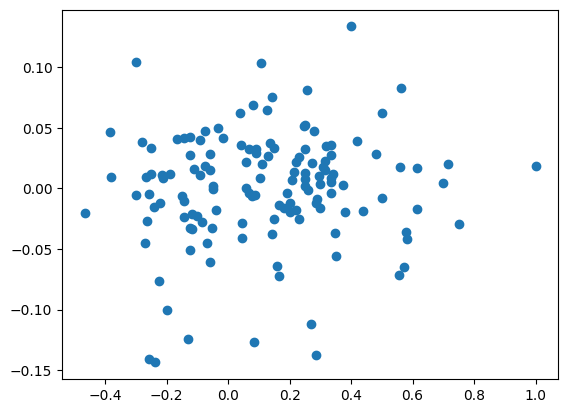

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(kospi['Sentiment'], kospi['Change'])
plt.plot()

In [ ]:
import statsmodels.api as sm

x = kospi['Sentiment']
y = kospi['Change']
r = sm.OLS(y, x).fit()
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Change   R-squared (uncentered):                   0.007
Model:                            OLS   Adj. R-squared (uncentered):              0.000
Method:                 Least Squares   F-statistic:                              1.016
Date:                Mon, 15 May 2023   Prob (F-statistic):                       0.315
Time:                        10:43:23   Log-Likelihood:                          224.39
No. Observations:                 136   AIC:                                     -446.8
Df Residuals:                     135   BIC:                                     -443.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Sentiment      0.0135      0.013      1.008      0.315      -0.013       0.040
==============================================================================
Omnibus:                       15.135   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.462
Skew:                          -0.624   Prob(JB):                     3.60e-05
Kurtosis:                       4.432   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""